# Machine Learning Assignment 1
Muhammad Ghulam Abbas (29417) and Muhammad Adnan Ali(29401)

# k Nearest Neighbours
In this project, I build a k Nearest Neighbours classifier for prediction of salary

# Dataset Description
The data set can be found at the following url:-https://archive.ics.uci.edu/dataset/2/adult

The attribute information of this dataset is as follows:-
1.age

2.workclass

3.fnlwgt

4.education

5.education.num

5.marital.status

7.occupation

8.relationship

9.race

10.sex

11.capital.gain

12.capital.loss

13.hours.per.week

14.native.country

15.income

# Import packages


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from ucimlrepo import fetch_ucirepo
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
print(url)
df = pd.read_csv(url)


https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data


In [3]:
df.head().T

,0,1,2,3,4
39,50,38,53,28,37
State-gov,Self-emp-not-inc,Private,Private,Private,Private
77516,83311,215646,234721,338409,284582
Bachelors,Bachelors,HS-grad,11th,Bachelors,Masters
13,13,9,7,13,14
Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial
Not-in-family,Husband,Not-in-family,Husband,Wife,Wife
White,White,White,Black,Black,White
Male,Male,Male,Male,Female,Female


In [4]:
column_names = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']
df.columns=column_names 

# Data Cleaning

In [5]:
def null_check(df):
    null_columns = []
    for column in df.columns:
        null_count = df[column].isnull().sum()
        if null_count > 0:
            null_columns.append((column, null_count))
    return null_columns

null_cols = null_check(df)
print(null_cols)


[]


In [6]:
all_columns = list(df.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(df.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))


all_columns:
 ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
Categorical columns:
 ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country', 'Earning_potential']
Numerical columns:
 ['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'hrs_per_week']


In [7]:
df.isna().sum()

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

In [8]:
df= df.replace(to_replace = '%?%', value = np.nan)


In [9]:
df

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
print(df.describe())


           Age     fnlwgt  Education-num  Capital-gain  Capital-loss  \
count 32560.00   32560.00       32560.00      32560.00      32560.00   
mean     38.58  189781.81          10.08       1077.62         87.31   
std      13.64  105549.76           2.57       7385.40        402.97   
min      17.00   12285.00           1.00          0.00          0.00   
25%      28.00  117831.50           9.00          0.00          0.00   
50%      37.00  178363.00          10.00          0.00          0.00   
75%      48.00  237054.50          12.00          0.00          0.00   
max      90.00 1484705.00          16.00      99999.00       4356.00   

       hrs_per_week  
count      32560.00  
mean          40.44  
std           12.35  
min            1.00  
25%           40.00  
50%           40.00  
75%           45.00  
max           99.00  


In [11]:
len(categorical_columns)


9

# Exploratory Data Analysis


In [12]:
df['Workclass']

0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32560, dtype: object

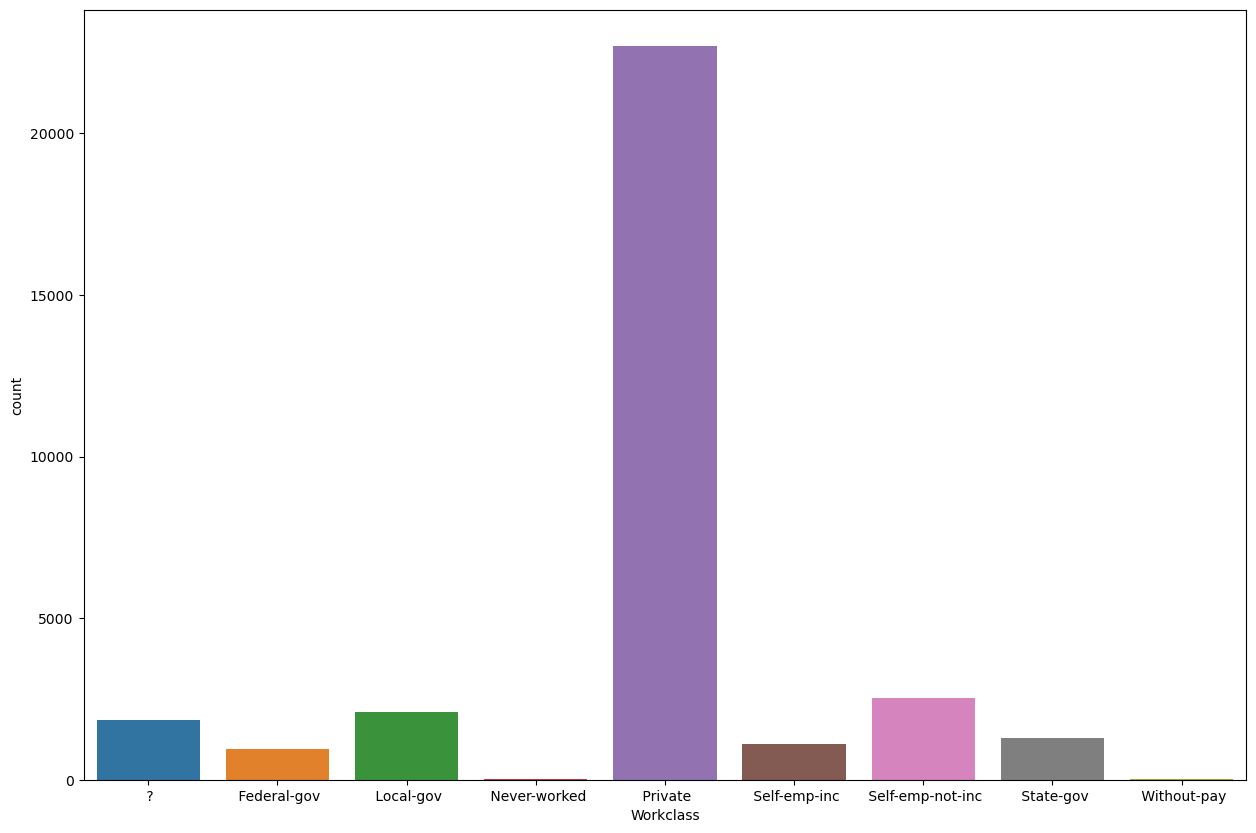

In [13]:
df['Workclass'] = df['Workclass'].astype('category')
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Workclass')
plt.show()

The dataset exhibits a notable imbalance, with the majority of respondents affiliated with the Private sector. This skew presents a significant bias, as the representation of other workclass categories is markedly limited.

In [14]:
df['Workclass'].value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [15]:
df.groupby(['Workclass', 'Earning_potential']).size()


Workclass          Earning_potential
 ?                  <=50K                1645
                    >50K                  191
 Federal-gov        <=50K                 589
                    >50K                  371
 Local-gov          <=50K                1476
                    >50K                  617
 Never-worked       <=50K                   7
                    >50K                    0
 Private            <=50K               17733
                    >50K                 4963
 Self-emp-inc       <=50K                 494
                    >50K                  622
 Self-emp-not-inc   <=50K                1817
                    >50K                  724
 State-gov          <=50K                 944
                    >50K                  353
 Without-pay        <=50K                  14
                    >50K                    0
dtype: int64

In [16]:
df[categorical_columns[1]]

0          Bachelors
1            HS-grad
2               11th
3          Bachelors
4            Masters
            ...     
32555     Assoc-acdm
32556        HS-grad
32557        HS-grad
32558        HS-grad
32559        HS-grad
Name: Education, Length: 32560, dtype: object

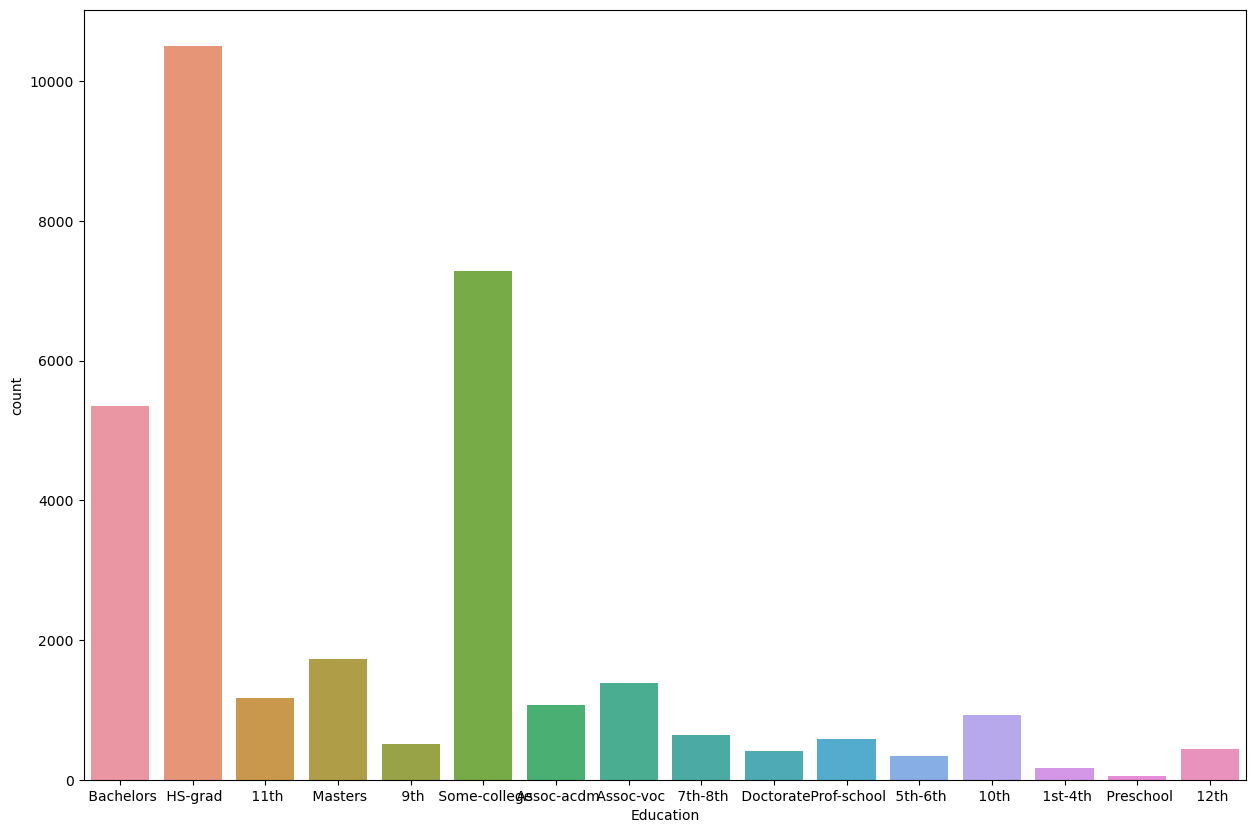

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x=categorical_columns[1], data=df)
plt.show()


The depicted graph highlights a significant trend within the surveyed population, revealing that a predominant portion has attained educational qualifications of at least a high school diploma, a bachelor's degree, or some level of college attendance.


In [18]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [19]:
df.groupby(['Education', 'Earning_potential']).size()


Education      Earning_potential
 10th           <=50K                871
                >50K                  62
 11th           <=50K               1115
                >50K                  60
 12th           <=50K                400
                >50K                  33
 1st-4th        <=50K                162
                >50K                   6
 5th-6th        <=50K                317
                >50K                  16
 7th-8th        <=50K                606
                >50K                  40
 9th            <=50K                487
                >50K                  27
 Assoc-acdm     <=50K                802
                >50K                 265
 Assoc-voc      <=50K               1021
                >50K                 361
 Bachelors      <=50K               3133
                >50K                2221
 Doctorate      <=50K                107
                >50K                 306
 HS-grad        <=50K               8826
                >50K    

From this we understand that most people with lower level of education usually earn less than 50k.

On the other hand people who have persued higher education like Masters and Doctorate are more likely to earn >50k.

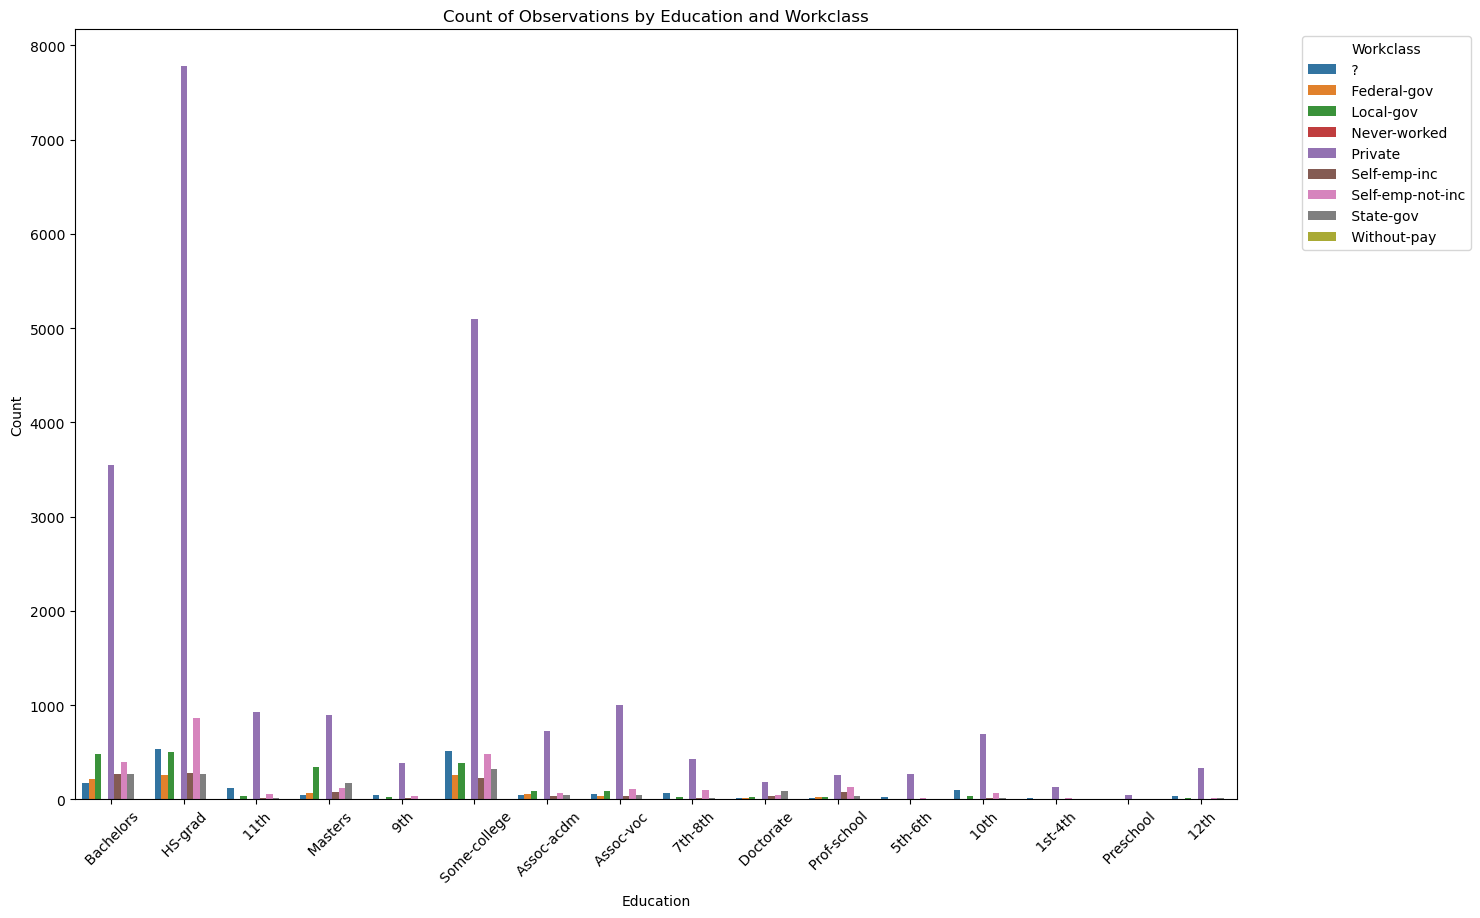

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Education', hue='Workclass')
plt.title('Count of Observations by Education and Workclass')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Workclass', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This gives us insigts on the relationship between workclass and education. we see that the only people who work without pay are the ones who had Assoc-acdm, are HS-Grads or those who went to some collage. We also see that no matter the educational level, the highest number of people in each category work in the private sector. The mode of each of those columns is of the private sector as well.



object


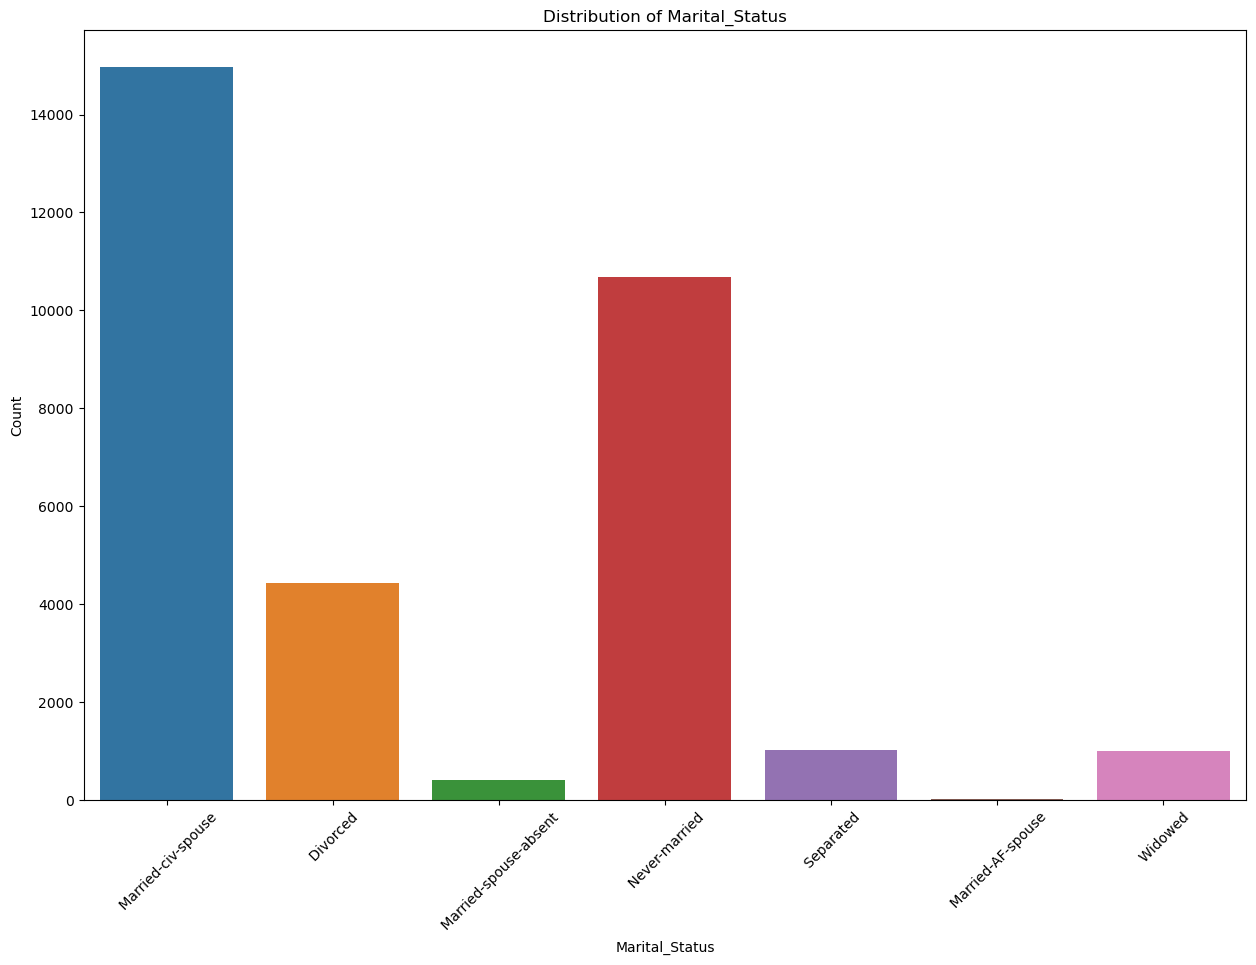

In [21]:
column_to_plot = categorical_columns[2]
print(df[column_to_plot].dtype)
plt.figure(figsize=(15, 10))
sns.countplot(x=column_to_plot, data=df)
plt.title('Distribution of ' + column_to_plot)
plt.xlabel(column_to_plot)
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [22]:
df.groupby(['Marital_Status', 'Earning_potential']).size()


Marital_Status          Earning_potential
 Divorced                <=50K                3980
                         >50K                  463
 Married-AF-spouse       <=50K                  13
                         >50K                   10
 Married-civ-spouse      <=50K                8284
                         >50K                 6692
 Married-spouse-absent   <=50K                 384
                         >50K                   34
 Never-married           <=50K               10191
                         >50K                  491
 Separated               <=50K                 959
                         >50K                   66
 Widowed                 <=50K                 908
                         >50K                   85
dtype: int64

 it shows individuals who are married to civilian spouses earn the most among the provided marital status categories.It also shows  individuals who have never been married (Never-married category) have the second-highest number of individuals earning over 50K.

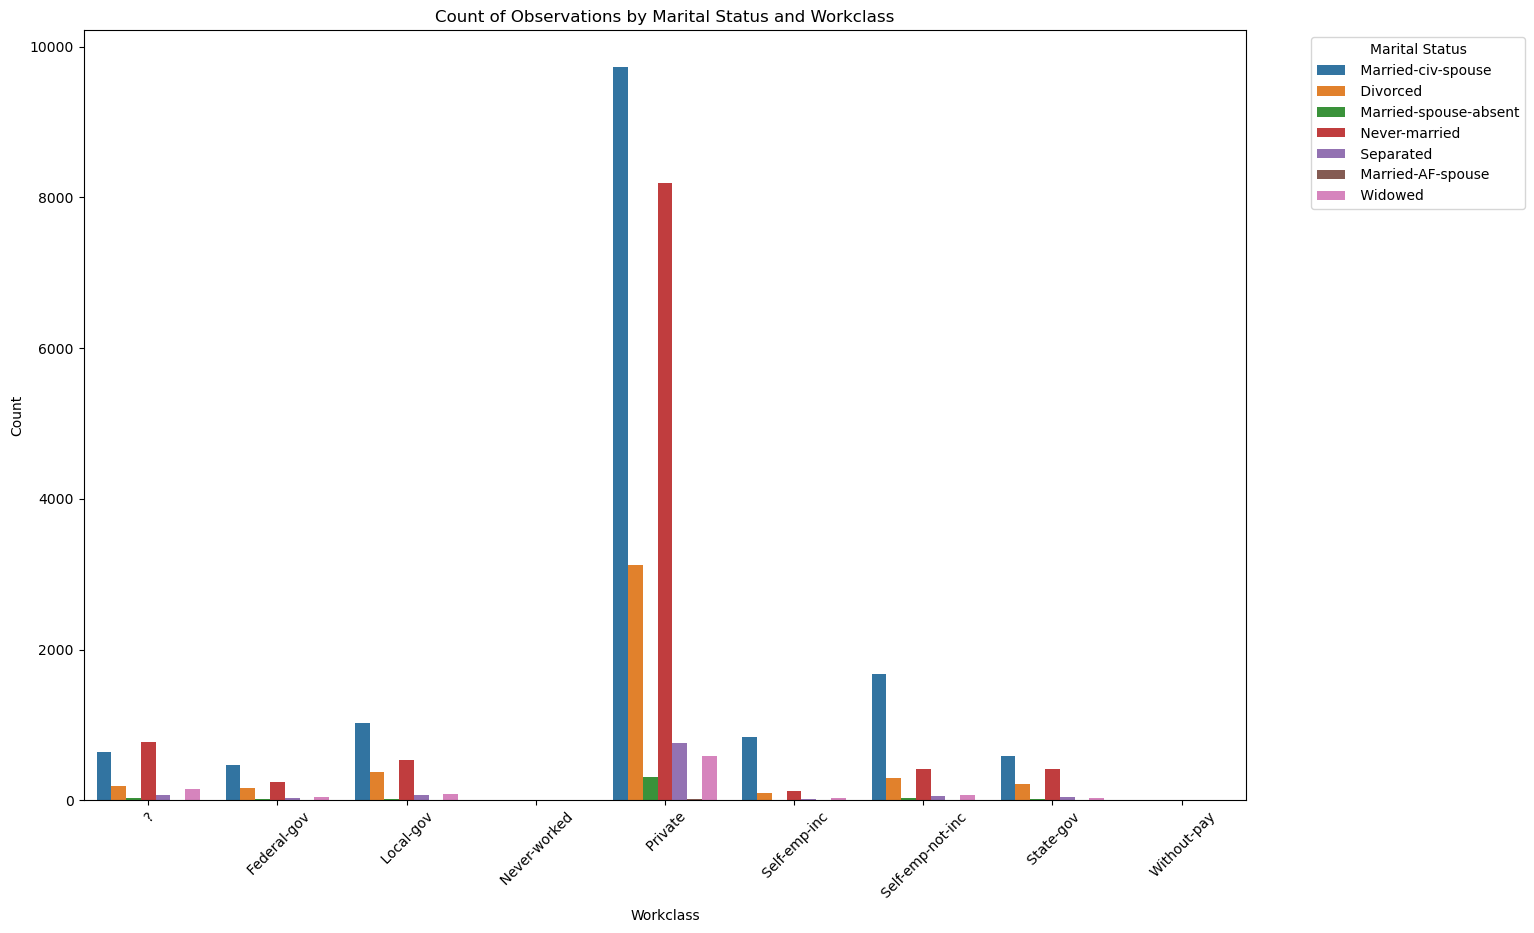

In [23]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Workclass', hue='Marital_Status')
plt.title('Count of Observations by Marital Status and Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Consistent with established trends, the private sector emerges as the predominant employer across all marital statuses. An interesting deviation occurs within the "Married-civ-spouse" category, where both local government and self-employment (without incorporated businesses) exhibit notable representation (exceeding 1,600 and 1,000 individuals, respectively), although the private sector still holds a substantial lead with over 9,700 individuals.


In [24]:
df.groupby(['Race', 'Earning_potential']).size()


Race                 Earning_potential
 Amer-Indian-Eskimo   <=50K                 275
                      >50K                   36
 Asian-Pac-Islander   <=50K                 763
                      >50K                  276
 Black                <=50K                2737
                      >50K                  387
 Other                <=50K                 246
                      >50K                   25
 White                <=50K               20698
                      >50K                 7117
dtype: int64

Observed data suggests a possible discrepancy in the ratio of individuals earning above 50k compared to those earning below or equal to 50k between White and Asian-Pacific Islander groups and other racial categories, with the 'Other' category exhibiting a particularly notable difference

# OUTLIEAR DETECTION:

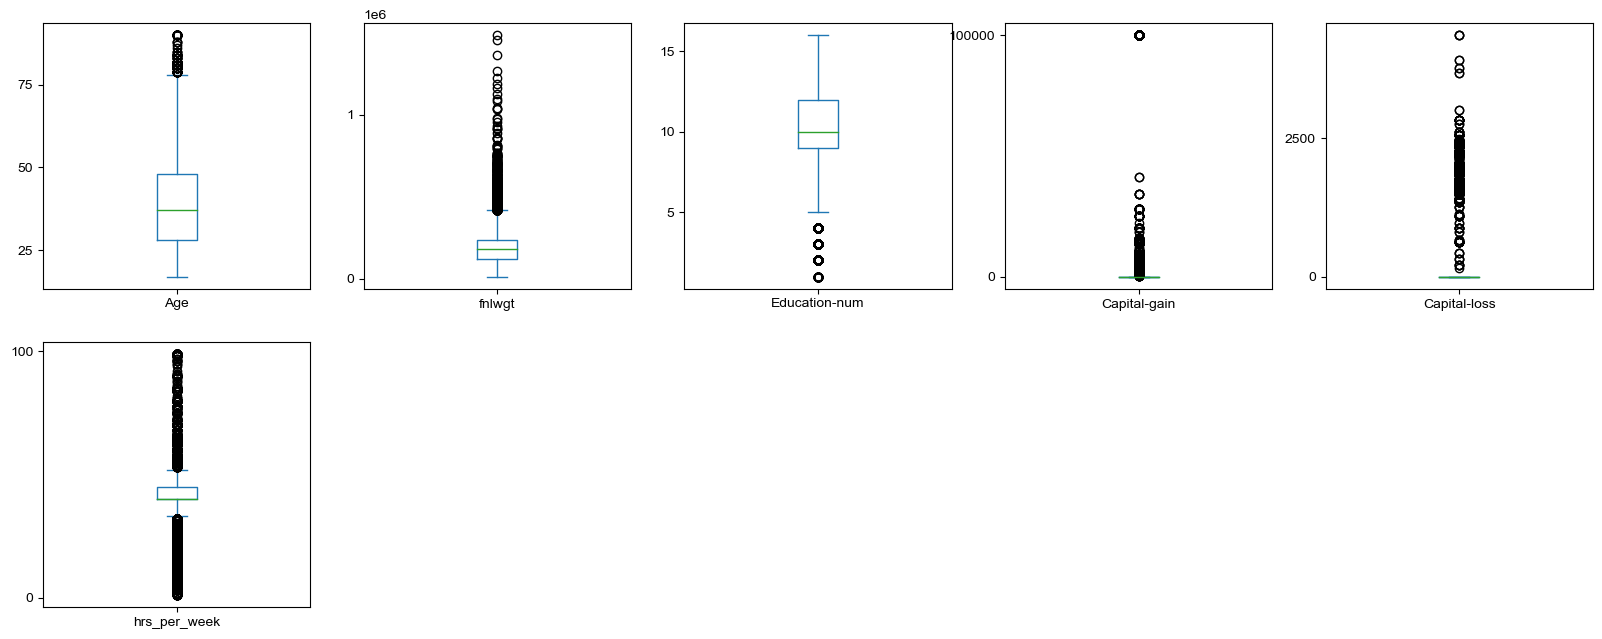

In [25]:
df.plot(kind= 'box' , subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20))
sns.set(font_scale = 3)

In [26]:
import pandas as pd

def outlier_removal(df, excluded_columns=[]):
    df_filtered = df.copy()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        if column not in excluded_columns:
            Q1 = df_filtered[column].quantile(0.25)
            Q3 = df_filtered[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]
    return df_filtered

# Example usage:
# Assuming you have a DataFrame named 'df'

# Call the outlier_removal function
filtered_df = outlier_removal(df)

# Print the resulting DataFrame
print(filtered_df)


       Age          Workclass  fnlwgt      Education  Education-num  \
1       38            Private  215646        HS-grad              9   
2       53            Private  234721           11th              7   
3       28            Private  338409      Bachelors             13   
4       37            Private  284582        Masters             14   
6       52   Self-emp-not-inc  209642        HS-grad              9   
...    ...                ...     ...            ...            ...   
32553   53            Private  321865        Masters             14   
32554   22            Private  310152   Some-college             10   
32555   27            Private  257302     Assoc-acdm             12   
32556   40            Private  154374        HS-grad              9   
32557   58            Private  151910        HS-grad              9   

            Marital_Status          Occupation    Relationship    Race  \
1                 Divorced   Handlers-cleaners   Not-in-family   White   

# FEATURE ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Workclass'] = le.fit_transform(df['Workclass'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Native-Country'] = le.fit_transform(df['Native-Country'])
df['Earning_potential'] = le.fit_transform(df['Earning_potential'])

# Model Training


In [28]:
df = df.drop(['Education', 'fnlwgt'], axis = 1)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
X = df.drop(['Earning_potential'],axis = 1)
y = df['Earning_potential']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [32]:
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)



In [33]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.8363


In [34]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
knn_5 = KNeighborsClassifier(n_neighbors=5)


knn_5.fit(X_train, y_train)


y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.8374


In [36]:
knn_10 = KNeighborsClassifier(n_neighbors=10)


knn_10.fit(X_train, y_train)


y_pred_10 = knn_10.predict(X_test)


print('Model accuracy score with k=10: {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=10: 0.8374


# MODEL EVALUATION:-

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

In [38]:
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-score for each class:", f1)

Precision for each class: [0.88911129 0.66226913]
Recall for each class: [0.89664917 0.64441592]
F1-score for each class: [0.89286432 0.65322056]


In [39]:
accuracy = accuracy_score(y_test, y_pred)
print('Overall accuracy:', accuracy)

Overall accuracy: 0.8363022113022113


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4954
           1       0.66      0.64      0.65      1558

    accuracy                           0.84      6512
   macro avg       0.78      0.77      0.77      6512
weighted avg       0.83      0.84      0.84      6512



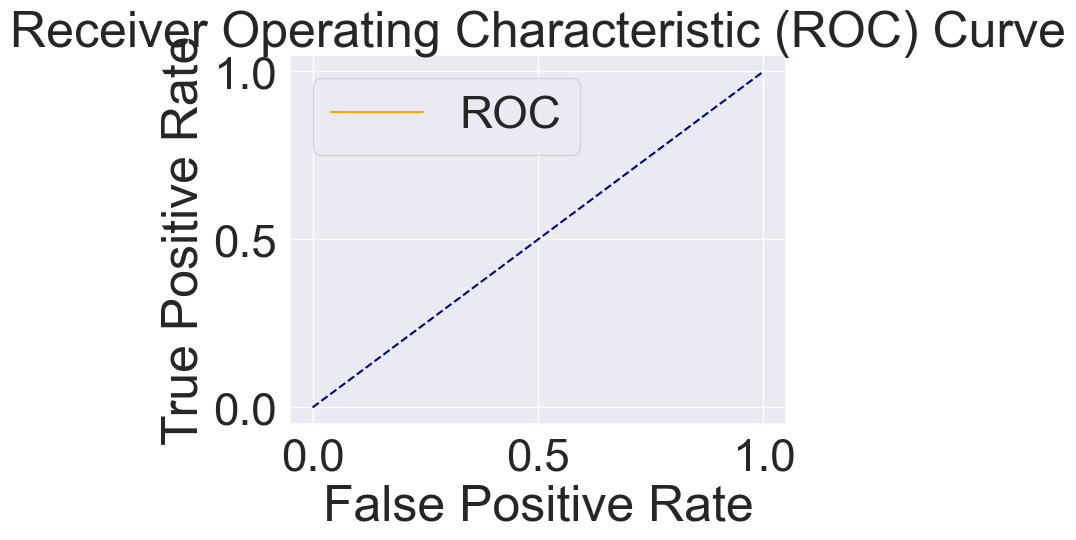

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# RESULTS:-

In this project, a k-Nearest Neighbors (kNN) classifier model was developed to prediction of salary. The model achieved high performance, with an accuracy of 83 using k=2.

With increasing K there is no sudden change